# Analysis of Data Related to European Football Leagues

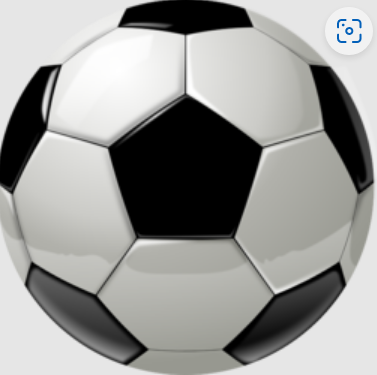

# Introduction

Football is believed to have originated in China in the third century BC. It is the world’s most popular ball game in number of players and spectators. Football is a game in which two teams of 11 players, use any part of their bodies except their hands and arms to maneuver the ball into the opposing team’s goal. Only the goalkeeper is permitted to use his hands and may do so only within the penalty area surrounding the goal. The team that scores the most goals wins. The standard length of a game is 90 minutes with a short break, known as "half time," at the 45-minute mark. Football’s governing body is the Fédération Internationale de Football Association (FIFA). Only America and Canada call the sport soccer.

# Goal

In this report, I analyze the data of the Ultimate 25k+ Matches Football Database (European) from Kaggle to determine if there are ways to gain an advantage in predicting the outcome of a game for purposes of betting.

# Jupyter Notebooks

For this project, I created a separate Jupyter Notebook for the data overview and preprocessing part of this report. Therefore, this project is comprised of two Jupyter Notebooks:
1. Data Overview and Preprocessing
2. The Project
We are currently in the Project Notebook which imports the Data Overview and Preprocessing Notebook in a later section.

# Technical Requirements

1. Perform Data cleaning, exploratory data analysis and feature engineering.
2. Use parameters that gives the most important statistical insights into the data.
3. Create visualizations.
4. Perform statistical inferences and hypothesis testing. Set appropriate significance levels and create confidence intervals for the variables of interest.
5. Apply linear machine learning models and use them for forecasting. 
6. Use cross-validation, information criteria, and other methods to specify correct modeling.
7. Choose and use appropriate metrics to measure models' performances.
8. Provide clear explanations. 
9. Provide conclusions and suggest how the analysis can be improved.

# Standards

Below is a summary of the standards I followed to create this report. 

>* **Standard 1:** In the matches table, 11 players from each team are listed. I assumed that these 11 players are the only players that participated in the specific game, although this is highly unlikely. 
>* **Standard 2:** I changed all column headers to follow the specific format of capitalizing the first letter of each word and connecting the words without underscore, like this example: "CountryID". 
>* **Standard 3:** If a column contained more than 75% missing data, I eliminated that column from the table.
>* **Standard 4:** I dropped any column that I deemed unnecessary to achieve the goals of this report. 
>* **Standard 5:** For a good portion of this report, I concentrated on comparing matches played at home and away from home. 

# Biases

Below are the biases I identified while creating this report.

>* **Bias 1:** Clear information about players in each team is not part of this data set. This may be because the players can change at any moment in the game and this information is not entered. 
>* **Bias 2:** I have no expertise in football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. 

# Libraries

In [153]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
import math
import xml.etree.ElementTree as ET
import eli5 as eli

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from xml.etree.ElementTree import fromstring, ElementTree
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.svm import SVC
from eli5.sklearn import PermutationImportance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.metrics import r2_score

# Display Parameters

## Display Features

In [2]:
%matplotlib inline
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 999
pd.options.display.max_colwidth = 500
warnings.filterwarnings("ignore")

## Colors

In [3]:
color_1 = "bisque"
color_2 = "crimson"
color_3 = "orangered"
color_4 = "lightcoral"
color_5 = "royalblue"
color_6 = "pink"
color_7 = "indianred"
color_8 = "slategrey"
color_9 = "salmon"
color_10 = "beige"
color_11 = "coral"
color_13 = "grey"
color_14 = "tan"
color_15 = "wheat"
color_16 = "tomato"

## Figure Parameters

In [4]:
size = 20

params = {
    "font.family": "Times New Roman",
    "font.size": size,
    "axes.labelsize": size,
    "xtick.labelsize": size * 0.75,
    "ytick.labelsize": size * 0.75,
    "figure.titlesize": size * 1.5,
    "axes.titlesize": size * 1.5,
    "axes.titlepad": size,
    "axes.labelpad": size - 10,
    "lines.linewidth": 2,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.spines.left": False,
    "axes.spines.bottom": False,
    "legend.fontsize": size,
}

# Data Overview and Preprocessing

I performed this section of the project in a second Jupyter Notebook.

In [ ]:
%run C:\Users\Space\Documents\py\Projects\TuringCollege\Football\FootballDataCleaning.ipynb

### Section Summary
> * The data overview and preprocessing were completed in a second Jupyter Notebook.
> * The results of the Data Overview and Preprocessing Notebook are 3 dataframes, players, teams and matches. I utilized these dataframes for the remainder of this report.

# Exploratory Data Analysis

In this section, I will use the players and teams dataframe to highlight important information in this data.

## Loading the Players Dataframe

In [5]:
players = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\players.csv",
    index_col=0,
)

In [6]:
players.head()

,PlayerID,PlayerName,Birthday,Height,Weight,Date,PreferredFoot,AttackWorkRate,DefenceWorkRate,OverallRating,Potential,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FreeKickAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Marking,StandingTackle,SlidingTackle
0,505942,Aaron Appindangoye,1992,182.88,187,2007,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
1,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0
2,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0
3,505942,Aaron Appindangoye,1992,182.88,187,2015,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0
4,505942,Aaron Appindangoye,1992,182.88,187,2016,right,medium,medium,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0


## Loading the Teams Dataframe

In [7]:
teams = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\teams.csv",
    index_col=0,
)

In [8]:
teams.head()

,TeamID,TeamLongName,TeamShortName,Date,BuildUpPlaySpeed,BuildUpPlayPassing,ChanceCreationPassing,ChanceCreationCrossing,ChanceCreationShooting,DefencePressure,DefenceAggression,DefenceTeamWidth
0,9987,KRC Genk,GEN,2010,45,45,50,35,60,70,65,70
1,9987,KRC Genk,GEN,2011,66,52,65,66,51,48,47,54
2,9987,KRC Genk,GEN,2012,53,55,55,48,56,47,45,55
3,9987,KRC Genk,GEN,2013,58,38,67,48,56,47,45,55
4,9987,KRC Genk,GEN,2014,58,38,67,48,56,47,45,55


## Loading the Matches Dataframe

In [9]:
matches = pd.read_csv(
    "C:\\Users\\Space\\Documents\\py\\Projects\\TuringCollege\\Football\\DataSets\\matches.csv",
    index_col=0,
)

In [10]:
matches.head()

,Date,LeagueID,LeagueName,MatchID,HomeTeamID,HomeTeamLongName,HomeTeamShortName,AwayTeamID,AwayTeamLongName,AwayTeamShortName,HomeGoal,AwayGoal,TotalGoals,HomePlayer1,HomePlayer2,HomePlayer3,HomePlayer4,HomePlayer5,HomePlayer6,HomePlayer7,HomePlayer8,HomePlayer9,HomePlayer10,HomePlayer11,AwayPlayer1,AwayPlayer2,AwayPlayer3,AwayPlayer4,AwayPlayer5,AwayPlayer6,AwayPlayer7,AwayPlayer8,AwayPlayer9,AwayPlayer10,AwayPlayer11,HomeShoton,AwayShoton,HomeShotoff,AwayShotoff,HomeFoulCommit,AwayFoulCommit,HomeCard,AwayCard,HomeCross,AwayCross,HomeCorner,AwayCorner,HomeBuildUpPlaySpeed,HomeBuildUpPlayPassing,HomeChanceCreationPassing,HomeChanceCreationCrossing,HomeChanceCreationShooting,HomeDefencePressure,HomeDefenceAggression,HomeDefenceTeamWidth,AwayBuildUpPlaySpeed,AwayBuildUpPlayPassing,AwayChanceCreationPassing,AwayChanceCreationCrossing,AwayChanceCreationShooting,AwayDefencePressure,AwayDefenceAggression,AwayDefenceTeamWidth,Result
0,2010,1,Belgium Jupiler League,665626,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,3,2,5,72.0,72.0,72.0,74.0,70.0,71.0,75.0,68.0,72.0,78.0,74.0,72.0,72.0,68.0,72.0,68.0,69.0,70.0,70.0,70.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,1
1,2010,1,Belgium Jupiler League,838635,8635,RSC Anderlecht,AND,8342,Club Brugge KV,CLB,2,2,4,72.0,74.0,70.0,71.0,60.0,72.0,69.0,68.0,68.0,72.0,74.0,65.0,72.0,68.0,67.0,72.0,68.0,70.0,72.0,72.0,72.0,70.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,35,70,50,60,70,50,70,35,40,45,50,45,60,70,70,0
2,2010,1,Belgium Jupiler League,838544,9986,Sporting Charleroi,CHA,8342,Club Brugge KV,CLB,0,5,5,55.0,63.0,62.0,64.0,64.0,63.0,66.0,62.0,61.0,72.0,63.0,65.0,72.0,68.0,70.0,72.0,72.0,64.0,72.0,72.0,70.0,72.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,40,50,45,43,60,70,70,70,35,40,45,50,45,60,70,70,-1
3,2010,1,Belgium Jupiler League,838714,8203,KV Mechelen,MEC,8342,Club Brugge KV,CLB,0,1,1,70.0,64.0,63.0,66.0,65.0,66.0,65.0,66.0,63.0,66.0,66.0,72.0,72.0,68.0,67.0,70.0,68.0,72.0,70.0,72.0,72.0,69.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,65,60,50,40,50,60,70,60,35,40,45,50,45,60,70,70,-1
4,2010,1,Belgium Jupiler League,665737,9997,Sint-Truidense VV,STT,8342,Club Brugge KV,CLB,1,1,2,68.0,70.0,65.0,64.0,65.0,66.0,63.0,67.0,64.0,62.0,73.0,72.0,72.0,68.0,70.0,70.0,68.0,69.0,70.0,72.0,71.0,69.0,3.0,3.0,4.0,3.0,7.0,7.0,2.0,2.0,11.0,8.0,3.0,3.0,50,50,50,50,50,50,50,50,35,40,45,50,45,60,70,70,0


# Description of Player and Team Attributes

Here is a description of each of the attributes used for the players and the teams in the dataframes.

## Player Attributes

An attribute is an ability that a player possesses. Most of the attributes are rated in the range of 0 to 99. The average rating of these attributes is reflected in the overall_rating field. The higher the value of these attributes, the better the player's ability. We can classify the value of an attribute with the following quality labels. Some of the attributes have a categorical label such as, "High," "Medium," or "low."<BR>

- **Excellent:** 90 - 99
- **Very Good:** 80 - 89
- **Good:** 70 - 79 
- **Fair:** 50 - 69 
- **Poor:** 40 - 49 
- **Very Poor:** 0 - 39
    
**OverallRating:** Overall rating of the player's skills based on the average of the other attributes. <BR>
**Potential:** Estimate of the maximum overall rating of a player in his professional career.<BR>
**PreferredFoot:** Which leg the player tends to play with.<BR>
**AttackWorkRate:** Level of involvement or participation of a player in attacking movements. These attributes can have the values high, medium and low.<BR> 
**DefenseWorkRate:** Level of involvement or participation of a player in defensive movements. These attributes can have the values high, medium and low.   
**Card:** Penalty cards are used by referees to indicate that a player has committed a foul. <BR>
**Crossing:** Quality and precision of a player to make a pass toward the center of the field, near the opponent's goal. <BR>
**Finishing:** Ability to score a goal.<BR> 
**HeadingAccuracy:** Accuracy in passing or clearing the ball using their head.<BR> 
**ShortPassing:** Ability to make short passes <BR> 
**Volleys:** Ability to take shots or passes while the ball is in the air. <BR> 
**Dribbling:** Ability to maintain possession of the ball against an opponent. <BR> 
**Curve:** Ability to perform passes or shots with a curve effect.<BR> 
**FreeKicAccuracy:** Accuracy or skill of the player in free kicks.<BR> 
**LongPassing:** Ability to make long passes<BR> 
**BallControl:** Level of control of the player over the ball.<BR> 
**Acceleration:** Ability to increase the speed of the player on the field.<BR> 
**SprintSpeed:** Speed of the player<BR> 
**Agility:** How fast a player can handle the ball.<BR> 
**Reactions:** Response time of the player to events that happen around him.<BR> 
**Balance:** Balance level.<BR> 
**ShotPower:** Power of a player's shots.<BR> 
**Jumping:** Quality of jumping.<BR> 
**Stamina:** Ability to maintain physical effort.<BR> 
**Strength:** Physical strength of the player.<BR> 
**LongShots:** Ability to take long shots.<BR> 
**Aggression:** Frequency of pushing, pulling and blocking members of the opposing team.<BR> 
**Interceptions:** Ability to intercept the ball during passes from the opposing team.<BR> 
**Positioning:** Ability to take the correct position on the field.<BR> 
**Vision:** Mental ability to remember the positions of his teammates.<BR> 
**Penalties:** Accuracy to make penalty shots.<BR> 
**Marking:** Ability to defend against a play by the opposing team.<BR> 
**StandingTackle:** Ability to make standing tackles -- extend the leg to move the ball away from the opponent.<BR> 
**SlidingTackle:** Ability to make sliding tackles -- extend the leg to move the ball away from the opponent.  

## Team Attributes

**BuildUpPlaySpeed:** Speed at which the team can stage an attack. <BR>
**BuildUpPlayPassing:** Ability to pass the ball to team members.<BR>
**ChanceCreationPassing:** Passes made by players that lead to a scoring opportunity for their team.<BR>
**ChanceCreationCrossing:** Passes made by players toward the center of the pitch, to create a goal-scoring opportunity for their team.<BR> 
**ChanceCreationShooting:** Ability of a player to create a scoring opportunity for their team by taking a shot on goal or setting up a teammate for a shot.<BR>     
**DefencePressure:** Putting pressure on the opposing team's players when they have the ball.<BR>
**DefenceAggression:** A tactical approach where the defenders of a team play in a highly assertive manner to win back possession of the ball or stop the opposition's attack. <BR>
**DefenceTeamWidth:** The positioning of the defensive players in a way that maximizes the width of the team's defensive shape.<BR> 

# Total Number of Players

Information on approximately 10,000 players is included in this dataset.

In [11]:
players.PlayerID.nunique()

10410

# Total Number of Teams

Information on approximately 300 teams is included in this dataset.

In [12]:
teams.TeamID.nunique()

288

# Leagues by Total Number of Wins

The visualization below depicts leagues by the total number of wins.

In [51]:
league_most_wins = (
    matches.groupby("LeagueName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)

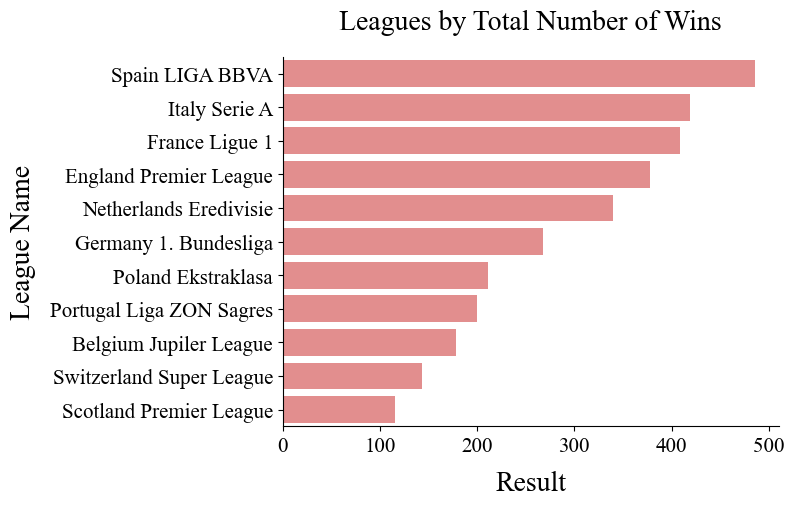

In [52]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="LeagueName", data=league_most_wins, color=color_4)

ax.set_ylabel("League Name")
plt.title("Leagues by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * League with the highest number of wins: Spain LIGA BBVA
> * League with the lowest number of wins: Scotland Premier League

# Top 10 Teams by Total Number of Wins

The visualization below depicts the top 10 teams with most wins.

In [38]:
team_most_wins = (
    matches.groupby("HomeTeamLongName")["Result"]
    .sum()
    .to_frame()
    .reset_index()
    .sort_values("Result", ascending=False)
)
team_most_wins = team_most_wins.head(10)

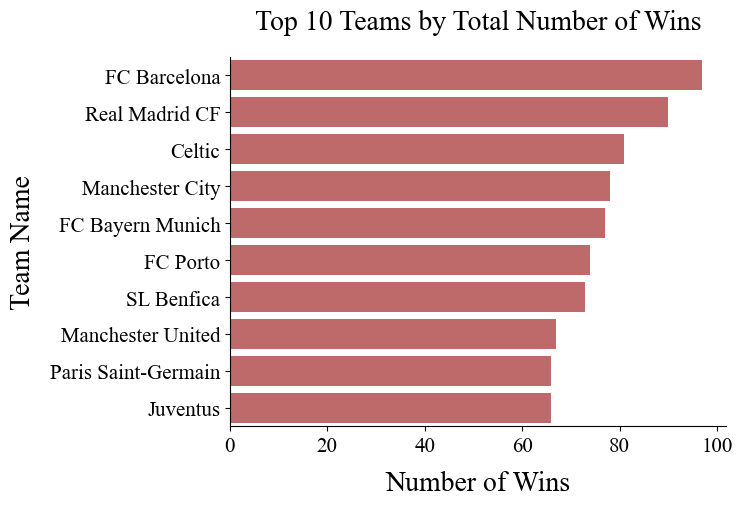

In [39]:
plt.rcParams.update(params)
fig, ax = plt.subplots()

sns.barplot(x="Result", y="HomeTeamLongName", data=team_most_wins, color=color_7)

ax.set_ylabel("Team Name")
ax.set_xlabel ("Number of Wins")
plt.title("Top 10 Teams by Total Number of Wins", fontsize=size)
sns.despine()

### Section Summary
> * The top ten teams ordered by the number of wins are shown above.

# Player Birth Years

The visualization below indicates the distribution of ages of the players.

In [27]:
birthdays = players.groupby("Birthday")["PlayerID"].nunique()
birthdays = birthdays.to_frame().reset_index().rename(columns={"PlayerID": "Count"})

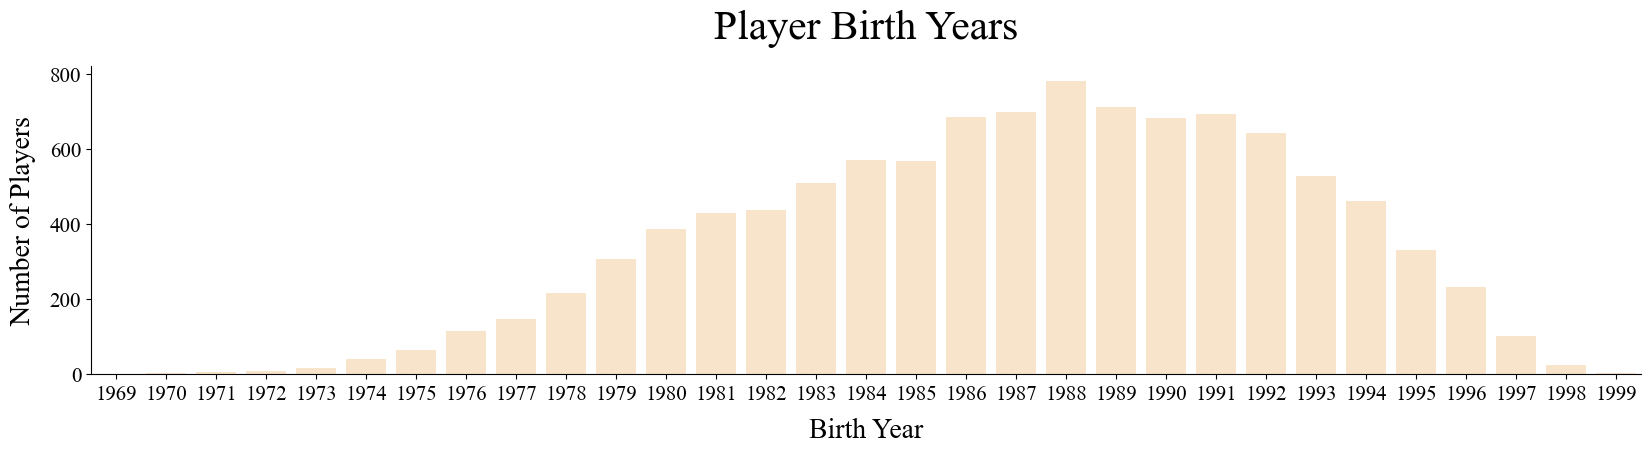

In [28]:
plt.rcParams.update(params)
fig, ax = plt.subplots(figsize=(20, 4))

sns.barplot(data=birthdays, x="Birthday", y="Count", color=color_1)

ax.set_xlabel("Birth Year")
ax.set_ylabel("Number of Players")
plt.title("Player Birth Years", fontsize=size * 1.5)
sns.despine()

### Section Summary
> * From the birth year of the players and the dates this data was collected, it seems that most players were in their twenties at the time of accumulation of this data.

# Height and Weight of the Players

The visualization below shows the Height and weight of the players.

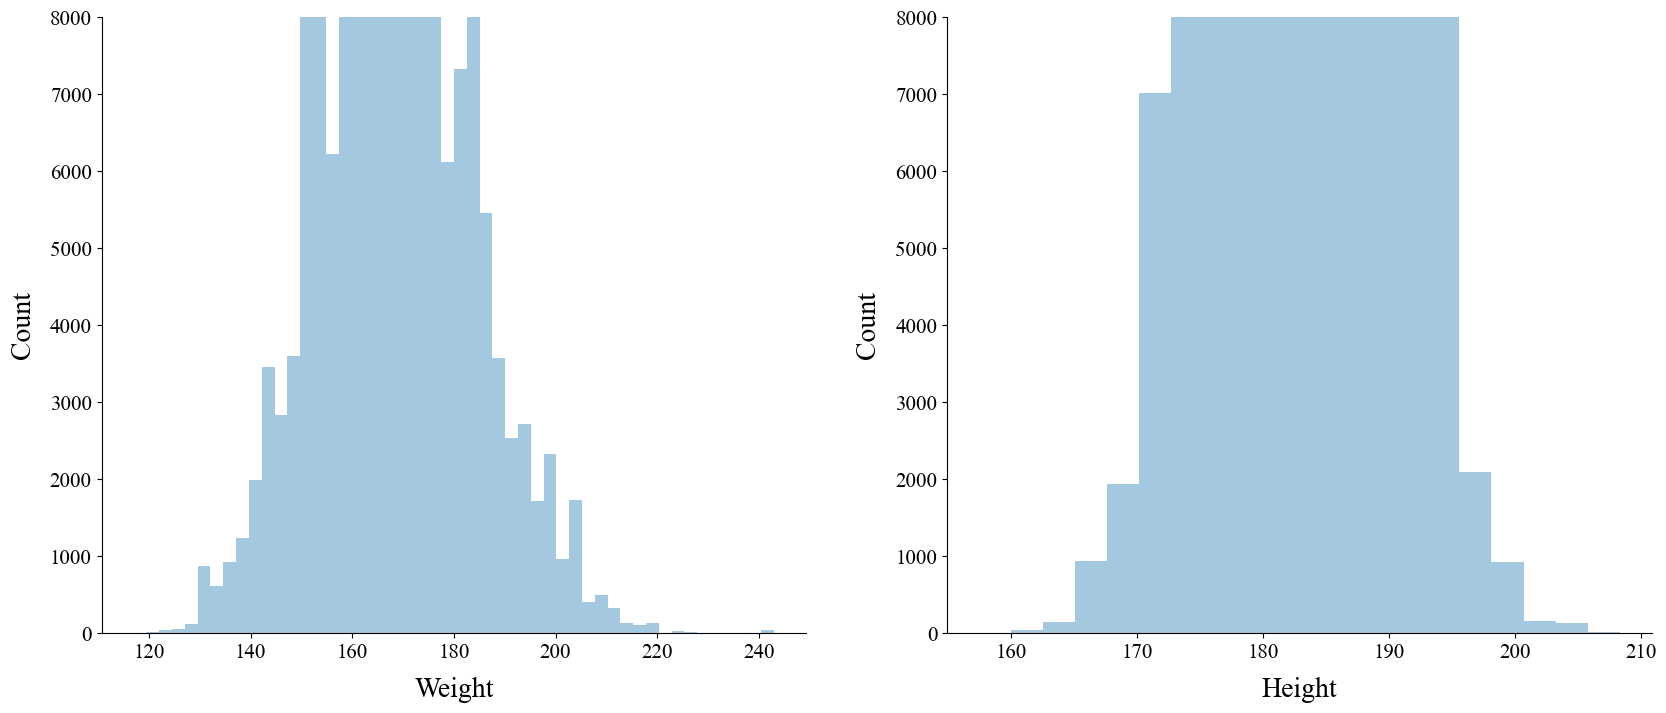

In [29]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

sns.distplot(players["Weight"], kde=False, ax=axes[0])
axes[0].set(xlabel="Weight", ylabel="Count", ylim=(0, 8000))

sns.distplot(players["Height"], kde=False, ax=axes[1], bins=20)
axes[1].set(xlabel="Height", ylabel="Count", ylim=(0, 8000))

sns.despine()

### Section Summary
> * The units for weight and height are not indicated in this data. I assume that height is measured in centimeters. Weight seems to be measured in pound (lb), which is equivalent to 0.45 kilograms.
> * From these visualizations, we can surmise that the weight of most players is between 150 and 190. 
> * From these visualizations, we can surmise that the height of most players is between 175 and 195. 

# Total Number of Goals at Matches Played at Home and Away from Home

The visualization below shows the total number of goals made in games played at home in comparison to those played away from home.

In [30]:
goals = matches[["HomeGoal", "AwayGoal"]]
goals = goals.sum(numeric_only=True)
goals = goals.to_frame().reset_index().rename(columns={"index": "Goals", 0: "Count"})

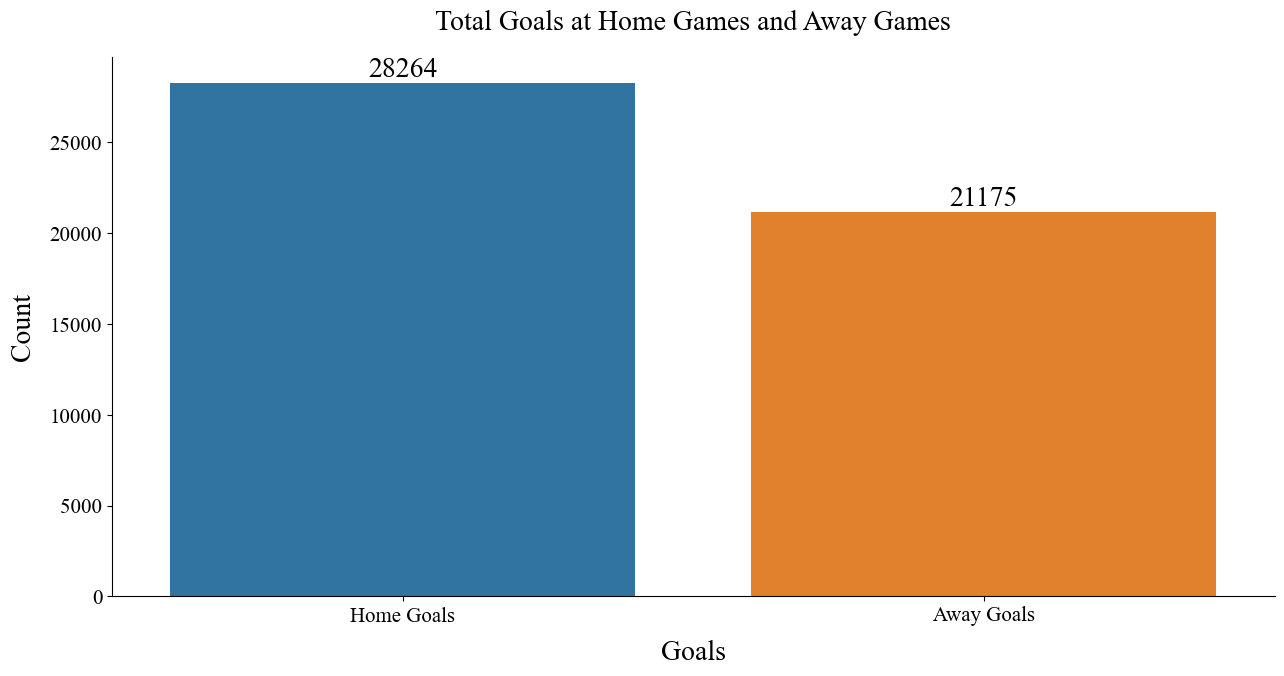

In [31]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

chart = sns.barplot(x="Goals", y="Count", data=goals, ax=axes)
chart.bar_label(chart.containers[0], size=size)

chart.set_xticklabels(["Home Goals", "Away Goals"])
plt.title("Total Goals at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * More goals were made by the teams when they played at home.
> * If we had to guess which team will win a match, a safe guess would be to pick the team playing at home.

# Hypothesis Test: Mean Number of Goals Made in Matches Played at Home and Away from Home

**Null**: There is no significant difference between the mean number of goals made for matches played at home and matches played away from home.<BR>
**Alternative**: The mean number of goals made for matches played at home is significantly different than the mean number of goals made for matches played away from home. 

## Two-Sample T-Test

In [231]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """
    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [232]:
home_goal = matches["HomeGoal"]
away_goal = matches["AwayGoal"]

## Numpy Variance Test

In [233]:
var_home_defensive_pressure = np.var(home_goal)
var_away_defensive_pressure = np.var(away_goal)

if var_home_defensive_pressure == var_away_defensive_pressure:
    variance = True
else:
    variance = False

## Two-Sample T-Test

In [234]:
two_sample_t_test(home_goal, away_goal, variance)

The variance of the samples are different.
Null hypothesis is rejected.


### Section Summary
> * I conducted a two-sample t-test to test this hypothesis, which required a check for variance differences between the samples. The Numpy variance test indicated that the variances of the sample are different. 
> * At a p-value of 0.05, the null hypothesis was rejected, indicating that there is a statistically significant difference between the mean number of goals made at home games and the mean number of goals made at away games. 

# Total Goals by Season at Home Games and Away Games

The visualization below depicts the total number of goals made in each season at games played at home and away from home.

In [43]:
goals_season = matches[["Date", "HomeGoal", "AwayGoal"]].groupby(by="Date").sum()
goals_season = goals_season.rename(
    columns={"HomeGoal": "Home Goals", "AwayGoal": "Away Goals"}
)

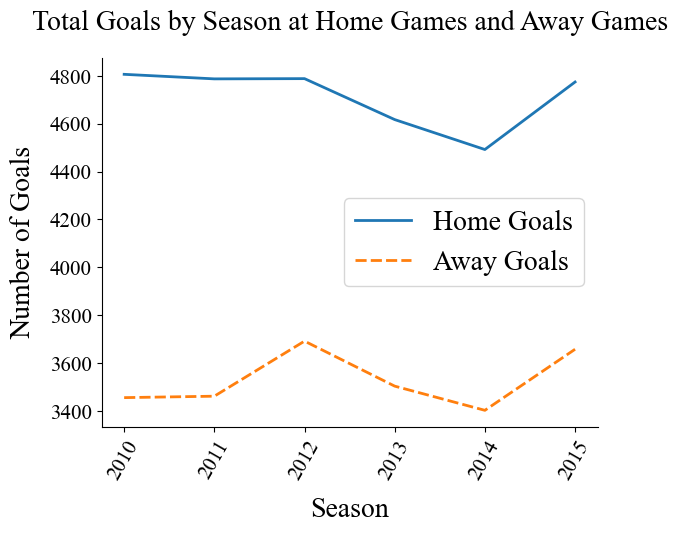

In [44]:
plt.rcParams.update(params)

sns.lineplot(data=goals_season)
plt.xticks(rotation=60)

labels = ["Away Goals", "Home Goals"]
plt.ylabel("Number of Goals")
plt.xlabel("Season")
plt.title("Total Goals by Season at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * In every season, the number of goals made by home teams were higher than by away teams.

# Preferred Foot of Players and Their Overall Rating

The visualization below shows the overall rating of right-footed and left-footed players.

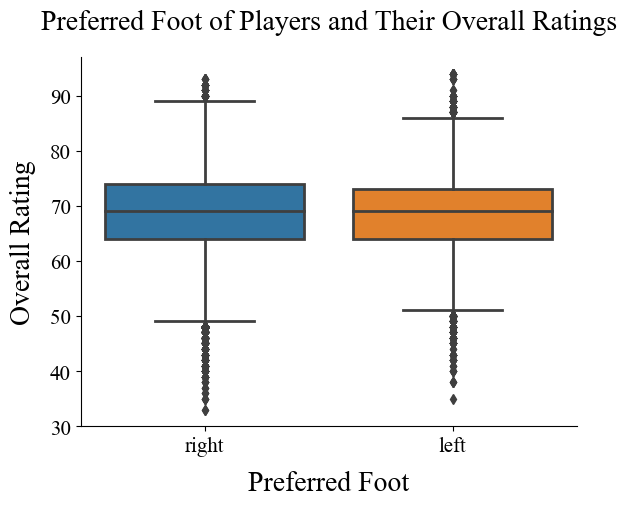

In [18]:
plt.rcParams.update(params)

sns.boxplot(x="PreferredFoot", y="OverallRating", data=players)

plt.xlabel("Preferred Foot")
plt.ylabel("Overall Rating")
plt.title("Preferred Foot of Players and Their Overall Ratings", fontsize=size)
sns.despine()

### Section Summary
> * We see that being dominant in one foot or another does not have much bearing on the overall rating of a player. 
> * However, the left-footers have slightly better overall ratings. The reasons for that are not clear.

# Current and Potential Ratings of Players

The visualization below shows a comparison between the current and potential overall ratings of the players. 

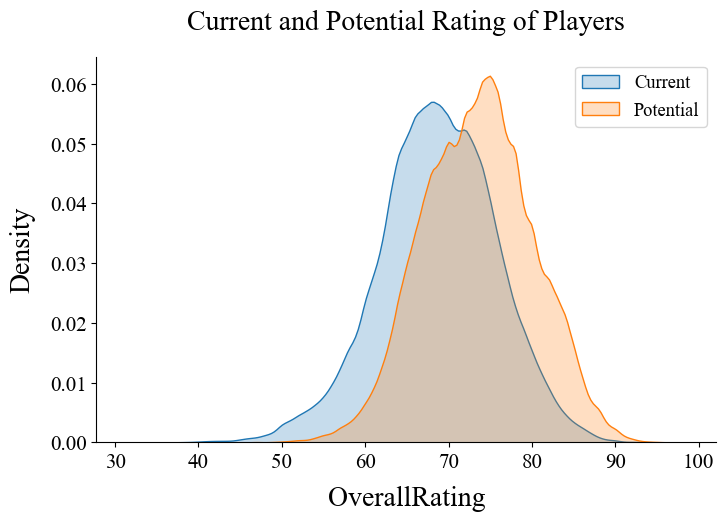

In [19]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=players["OverallRating"], fill=True, legend=True)
sns.kdeplot(data=players["Potential"], fill=True, legend=True)

ax.legend(["Current", "Potential"],fontsize=size/1.5)
ax.set_title("Current and Potential Rating of Players", fontsize=size)

sns.despine()

### Section Summary
> * There is very little difference between the Overall Rating and the Potential rating of the players.
> * However, the players are usually rated with a higher potential than their current rating.

# Attack and Defensive Ratings of Players

The visualization below shows the attack and defensive work rating of the players. Attack work rating is a measure of the level of participation of a player in attacking movements.  Defensive work rating is a measure of the level of participation of a player in defensive movements. 

In [23]:
players["AttackWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[~players["AttackWorkRate"].isin(allowed_values), "AttackWorkRate"] = np.nan

attack_values = players.groupby("AttackWorkRate")["PlayerID"].nunique()
attack_values = (
    attack_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
attack_values = attack_values.sort_values("Count", ascending=False)

In [24]:
players["DefenceWorkRate"].value_counts()
allowed_values = ["high", "medium", "low"]
players.loc[
    ~players["DefenceWorkRate"].isin(allowed_values), "DefenceWorkRate"
] = np.nan

defence_values = players.groupby("DefenceWorkRate")["PlayerID"].nunique()
defence_values = (
    defence_values.to_frame().reset_index().rename(columns={"PlayerID": "Count"})
)
defence_values = defence_values.sort_values("Count", ascending=False)

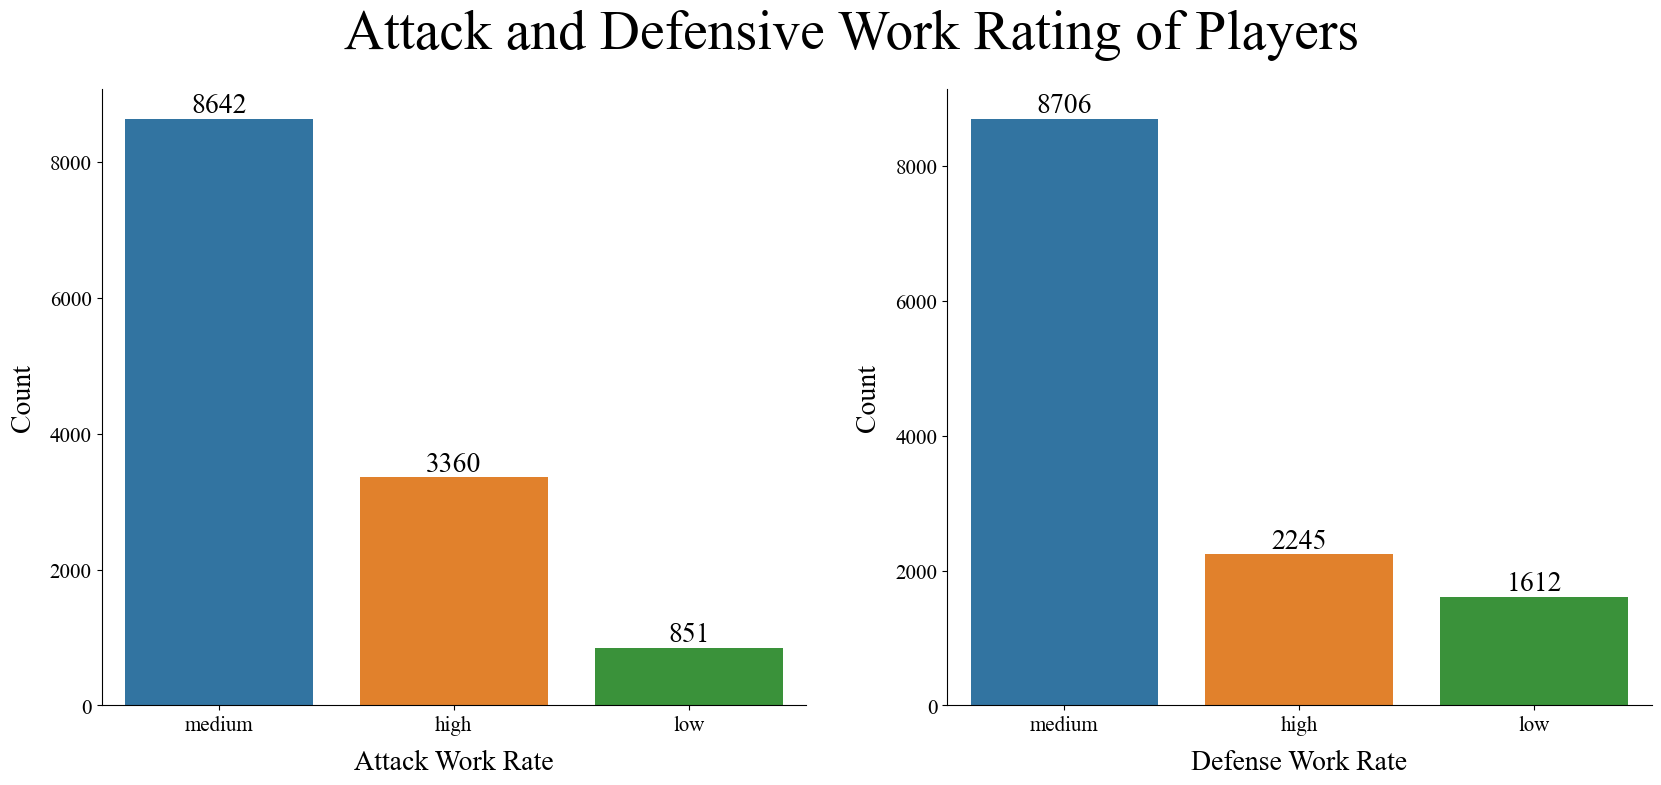

In [25]:
plt.rcParams.update(params)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1 = sns.barplot(data=attack_values, x="AttackWorkRate", y="Count", ax=ax1)
ax2 = sns.barplot(data=defence_values, x="DefenceWorkRate", y="Count", ax=ax2)

ax1.set_xlabel("Attack Work Rate")
ax1.set_ylabel("Count")
ax1.bar_label(ax1.containers[0], size=size)

ax2.set_xlabel("Defense Work Rate")
ax2.set_ylabel("Count")
ax2.bar_label(ax2.containers[0], size=size)

plt.suptitle("Attack and Defensive Work Rating of Players", fontsize=size * 2)
sns.despine()

### Section Summary
> * Most players are rated at a medium level in both the Attack and Defensive Work Ratings.
> * Further analysis could indicate if the players who are rated at a certain category in the Attack Work Rate are usually rated in the same category in the Defensive Work Rate. 

# Number of Crossings at Matches Played and Home and Away from Home

Crossing is the quality and precision of a player to make a pass toward the center of the field, near the opponent's goal. The visualization below shows the number of crossings when teams played at home and away from home.

In [32]:
cross = matches[["HomeCross", "AwayCross"]]
cross = cross.sum(numeric_only=True)
cross = cross.to_frame().reset_index().rename(columns={"index": "Cross", 0: "Count"})

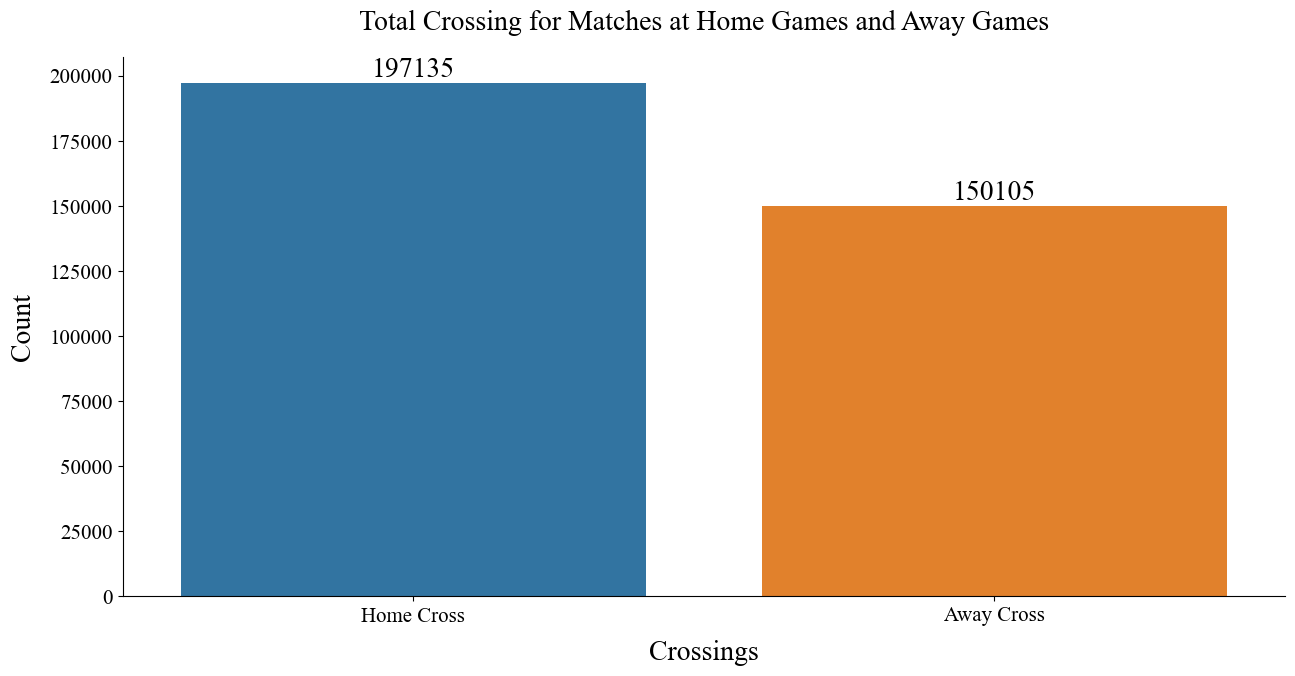

In [33]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

chart = sns.barplot(x="Cross", y="Count", data=cross, ax=axes)
chart.bar_label(chart.containers[0], size=size)

chart.set_xticklabels(["Home Cross", "Away Cross"])
chart.set_xlabel("Crossings")

plt.title("Total Crossing for Matches at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * More crossings were made by players when they played at home than away from home. 
> * This is significant because good crossings are one of the ways of winnig a game.

# Hypothesis Test: Mean of Number of Crosses at Matches Played at Home and Away from Home

**Null**: There is no significant difference between the mean number of crosses for matches played at home and matches played away from home.<BR>
**Alternative**: The mean number of crosses for matches played at home are significantly different than those values for matches played away from home.

## Two-Sample T-Test

In [36]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """
    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [37]:
home_cross = matches["HomeCross"]
away_cross = matches["AwayCross"]

## Numpy Variance Test

In [38]:
var_home_cross = np.var(home_cross)
var_away_cross = np.var(away_cross)

if var_home_cross == var_away_cross:
    variance = True
else:
    variance = False

## Two-Sample T-Test

In [39]:
two_sample_t_test(home_cross, away_cross, variance)

The variance of the samples are different.
Null hypothesis is rejected.


### Section Summary
> * To test this hypothesis, I conducted a two-sample t-test, which required a check for variance differences between the samples. The Numpy variance test indicated that the variances of the sample are different. 
> * At a p-value of 0.05, the null hypothesis was rejected, indicating that there is a statistically significant difference between the mean crossing values for matches played at home and matches played away from home.

# Number of Penalty Cards Received at Matches Played and Home and Away from Home

A penalty card is a tool used by referees to indicate that a player has committed a foul or broken a rule.

In [40]:
cards = matches[["HomeCard", "AwayCard"]]
cards = cards.sum(numeric_only=True)
cards = cards.to_frame().reset_index().rename(columns={"index": "Card", 0: "Count"})

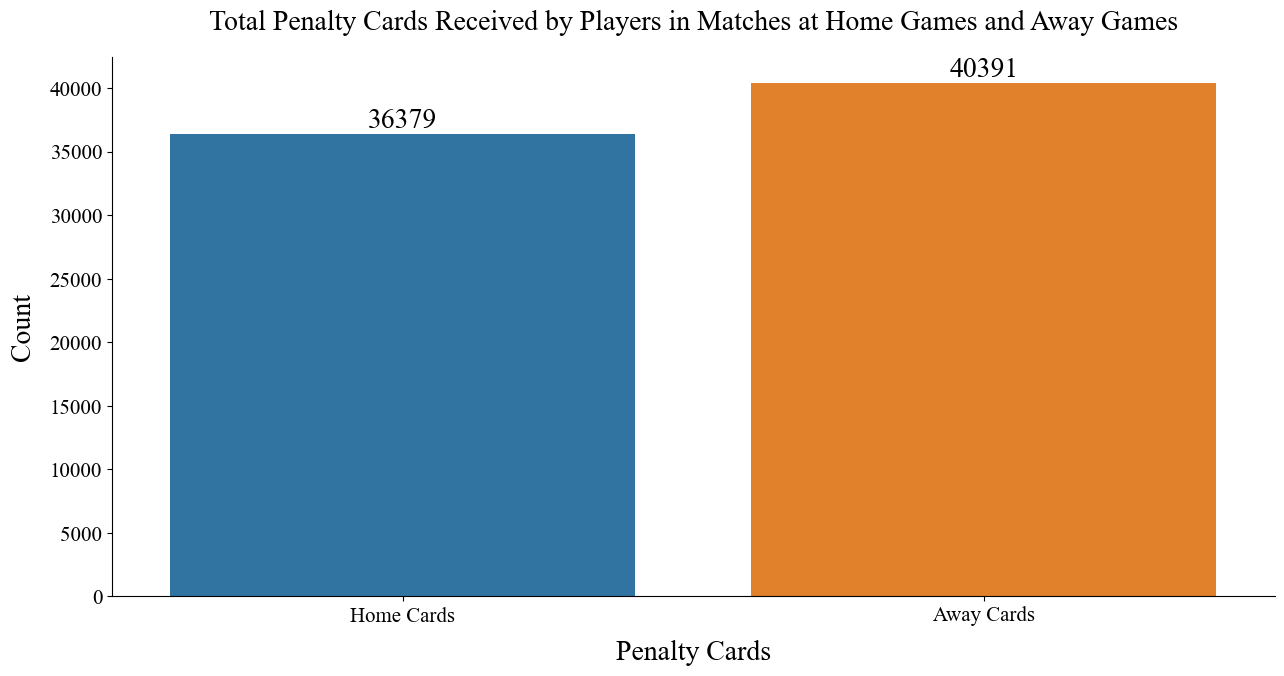

In [42]:
plt.rcParams.update(params)
fig, axes = plt.subplots(1, 1, figsize=(15, 7))

chart = sns.barplot(x="Card", y="Count", data=cards, ax=axes)
chart.bar_label(chart.containers[0], size=size)

chart.set_xticklabels(["Home Cards", "Away Cards"])
chart.set_xlabel("Penalty Cards")

plt.title("Total Penalty Cards Received by Players in Matches at Home Games and Away Games", fontsize=size)
sns.despine()

### Section Summary
> * Players of teams that played away from home received more penalty cards.
> * This is significant because receiving a card can mean a player cannot continue to play. Receiving a card also affects the team's morale.

# Hypothesis Test: Mean Number of Penalty Cards Received at Matches Played at Home and Away from Home

**Null**: There is no significant difference between the mean number of penalty cards received for matches played at home and matches played away from home.<BR>
**Alternative**: The mean number of penatly cards received for matches played at home are significantly different than the mean number of penalty cards received for matches played away from home. 

## Two-Sample T-Test

In [224]:
def two_sample_t_test(sample1, sample2, variance):
    """
    Determines if the means of two samples are significanlty different.
    """
    if variance is False:
        print("The variance of the samples are different.")
    else:
        print("The variance of the samples are the same.")

    result = stats.ttest_ind(sample1, sample2, equal_var=variance)

    if result.pvalue < 0.05:
        print("Null hypothesis is rejected.")
    else:
        print("Failed to reject the null hypothesis.")

In [226]:
home_card = matches["HomeCard"]
away_card = matches["AwayCard"]

## Numpy Variance Test

In [227]:
var_home_card = np.var(home_card)
var_away_card = np.var(away_card )

if var_home_cross == var_away_playspeed:
    variance = True
else:
    variance = False

## Two-Sample T-Test

In [228]:
two_sample_t_test(home_card, away_card, variance)

The variance of the samples are different.
Null hypothesis is rejected.


### Section Summary
> * I conducted a two-sample t-test to test this hypothesis, which required a check for variance differences between the samples. The Numpy variance test indicated that the variances of the sample are different. 
> * At a p-value of 0.05, the null hypothesis was rejected, indicating that there is a statistically significant difference between the mean of penalty cards received for matches played at home and matches played away from home. 

# Build Up Playing Speed at Matches Played at Home and Away from Home

The build-up play speed refers to the pace at which a team progresses the ball from their own half towards the opposing team's half, while maintaining possession and advancing towards their opponent's goal.

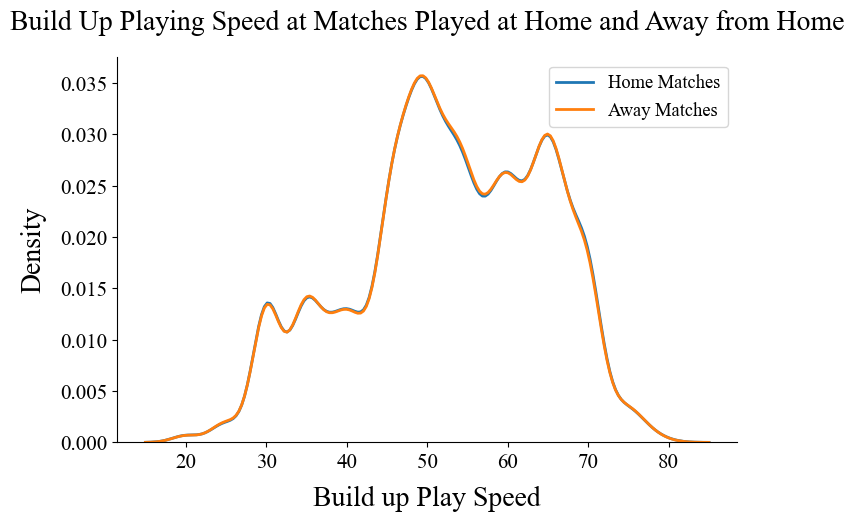

In [45]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=matches["HomeBuildUpPlaySpeed"], legend=True)
sns.kdeplot(data=matches["AwayBuildUpPlaySpeed"], legend=True)

ax.legend(["Home Matches", "Away Matches"],fontsize=size/1.5)
ax.set_xlabel("Build up Play Speed", fontsize=size)
ax.set_title("Build Up Playing Speed at Matches Played at Home and Away from Home", fontsize=size)

sns.despine()

### Section Summary
> * The data indicates that the buildup play speed is almost the same when teams played at home and away from home.
> * It may be that not much thought was given to collecting this part of the data, making this measure unreliable.

# Defensive Pressure at Matches Played at Home and Away from Home

Defensive pressure refers to the tactics used by a defending team to put pressure on the attacking team and disrupt their play.

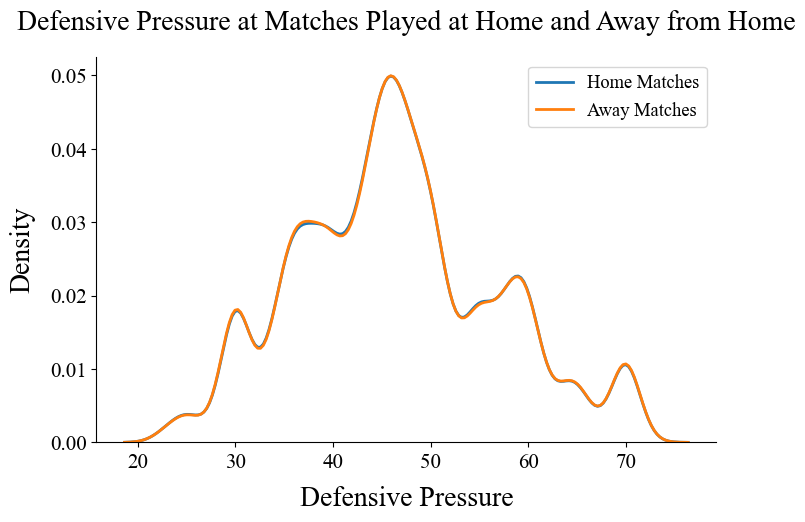

In [50]:
plt.rcParams.update(params)

fig, ax = plt.subplots(figsize=(8, 5))

sns.kdeplot(data=matches["HomeDefencePressure"], legend=True)
sns.kdeplot(data=matches["AwayDefencePressure"], legend=True)

ax.legend(["Home Matches", "Away Matches"],fontsize=size/1.5)
ax.set_xlabel("Defensive Pressure", fontsize=size)
ax.set_title("Defensive Pressure at Matches Played at Home and Away from Home", fontsize=size)

sns.despine()

### Section Summary
> * The data indicates that defensive pressure is almost the same when teams played at home and away from home.
> * It may be that not much thought was given to collecting this part of the data, making this measure unreliable.

# Machine Learning

In this section we will see several machine learning models that could possible be used to predict the outcome of the matches. 

In [67]:
def print_rsquared(y_test, y_predict):
    """
    Displays the R-Squared value.
    """

    print("R-Squared value is: ", np.round(r2_score(y_test, y_predict), 2))

In [76]:
def root_mean_squared_error(y_test, y_predict):
    """
    Calcuates thr Root Mean Squared Error
    """

    MSE = np.square(np.subtract(y_test, y_predict)).mean()
    RMSE = math.sqrt(MSE)
    RMSE = np.round(RMSE, 2)

    print("Root Mean Square Error is: ", RMSE)

In [68]:
X = matches.loc[:, "HomePlayer1":"AwayDefenceTeamWidth"]
y = matches["Result"]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, shuffle=True, random_state=101
)

In [70]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression

The section below shows a Logistic Regression model and its performance. 

In [139]:
lr = LogisticRegression(solver="saga", multi_class="ovr", max_iter=5000)

In [140]:
lr.fit(scaled_X_train, y_train);

In [141]:
y_predict = lr.predict(scaled_X_test)

### Feature Weights

In [142]:
eli.show_weights(lr, feature_names=X.columns.tolist())

### Classification Report

In [143]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.49      0.52      0.50      1050
           0       0.15      0.00      0.01       933
           1       0.55      0.83      0.66      1666

    accuracy                           0.53      3649
   macro avg       0.40      0.45      0.39      3649
weighted avg       0.43      0.53      0.45      3649



### Confusion Matrix

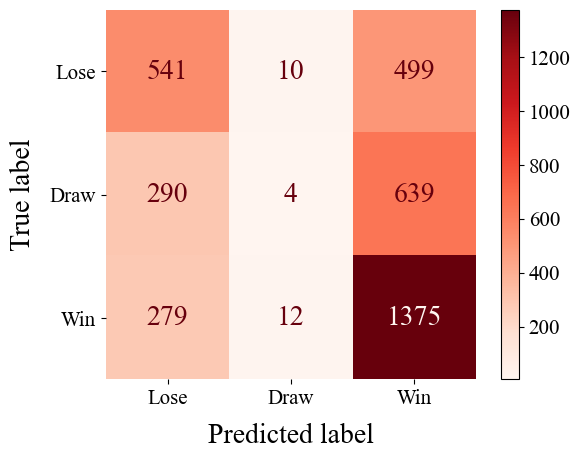

In [169]:
plot_confusion_matrix(lr,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [75]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.56


### Root Mean Squared Error

In [78]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.06


### Section Summary
> * Accuracy Score: 52
> * F1 Score Losses: 50
> * F1 Score Draws: 01
> * F1 Score Wins: 66
> * The overall accuracy score of the Logistic Regression model is just over 50, which makes the model not helpful to predict the outcome of a game with a high level of certainty. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 50, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Logistic Regression with Elastic Net Regularization

The section below shows a Logistic Regression model with Elastic Net Regularization and its performance. 

In [170]:
en = LogisticRegression(
    penalty="elasticnet",
    solver="saga",
    multi_class="ovr",
    max_iter=5000,
    l1_ratio=0.5,
    C=1,
)

In [171]:
en.fit(scaled_X_train, y_train);

In [172]:
y_predict = en.predict(scaled_X_test)

### Feature Weights

In [176]:
eli.show_weights(en, feature_names=X.columns.tolist())

### Classification Report

In [174]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.49      0.52      0.50      1050
           0       0.15      0.00      0.01       933
           1       0.55      0.82      0.66      1666

    accuracy                           0.53      3649
   macro avg       0.40      0.45      0.39      3649
weighted avg       0.43      0.53      0.45      3649



### Confusion Matrix

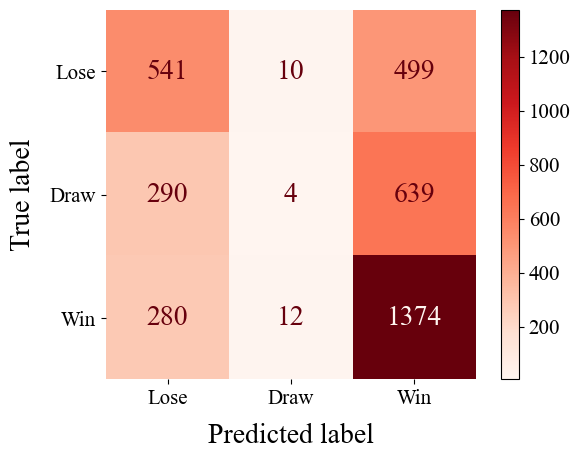

In [179]:
plot_confusion_matrix(en,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [84]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.56


### Root Mean Squared Error

In [85]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.06


### Section Summary
> * Accuracy Score: 53
> * F1 Score Losses: 50
> * F1 Score Draws: 01
> * F1 Score Wins: 66
> * The overall accuracy score of the Logistic Regression model is just over 53, which makes the model not helpful to predict the outcome of a game with a high level of certainty. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 50, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Decision Tree

In [90]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dtc = dtc.fit(scaled_X_train, y_train)
y_predict = dtc.predict(scaled_X_test)

### Feature Weights

In [91]:
eli.show_weights(dtc, feature_names=X.columns.tolist())

Weight,Feature
0.3726,HomePlayer8
0.3140,AwayPlayer8
0.1354,HomePlayer7
0.0749,AwayPlayer6
0.0530,AwayPlayer4
0.0355,HomeCross
0.0146,AwayCross
0,AwayPlayer10
0,AwayPlayer9
0,AwayPlayer7


### Classification Report

In [92]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.43      0.21      0.28      1050
           0       0.00      0.00      0.00       933
           1       0.48      0.91      0.63      1666

    accuracy                           0.47      3649
   macro avg       0.30      0.37      0.30      3649
weighted avg       0.34      0.47      0.37      3649



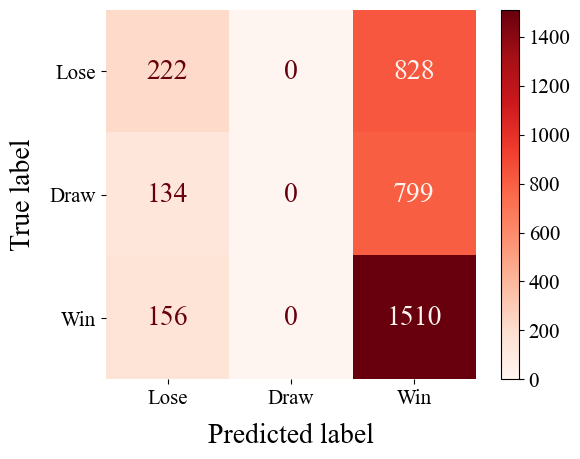

In [181]:
plot_confusion_matrix(dtc,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [93]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.86


### Root Mean Squared Error

In [94]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.16


### Section Summary
> * Accuracy Score: 47
> * F1 Score Losses: 28
> * F1 Score Draws: 00
> * F1 Score Wins: 63
> * The overall accuracy score of the Decision Tree model is 47, which makes the model not helpful to predict the outcome of a game with a high level of certainty.  
> * The F1 score for wins at 63, is comparable to the other models. 
> * The F1 score for losses at 28, is among the lowest as compared to the other models.
> * The F1 score for draws at 0, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Random Forest

The section below shows a Random Forest model and its performance. 

In [95]:
rfc = RandomForestClassifier(n_estimators=10, max_features="sqrt", random_state=101)

In [96]:
rfc.fit(scaled_X_train, y_train)
y_predict = rfc.predict(scaled_X_test)

### Feature Weights

In [59]:
eli.show_weights(rfc, feature_names=X.columns.tolist())

Weight,Feature
0.0312 ± 0.0140,HomePlayer8
0.0274 ± 0.0142,HomePlayer11
0.0269 ± 0.0145,AwayPlayer6
0.0264 ± 0.0116,AwayPlayer8
0.0257 ± 0.0085,AwayPlayer11
0.0255 ± 0.0135,HomePlayer9
0.0254 ± 0.0078,HomePlayer7
0.0253 ± 0.0054,AwayPlayer4
0.0249 ± 0.0102,HomePlayer10
0.0249 ± 0.0052,HomePlayer4


### Classification Report

In [97]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.42      0.42      0.42      1050
           0       0.28      0.20      0.24       933
           1       0.55      0.64      0.59      1666

    accuracy                           0.46      3649
   macro avg       0.42      0.42      0.41      3649
weighted avg       0.44      0.46      0.45      3649



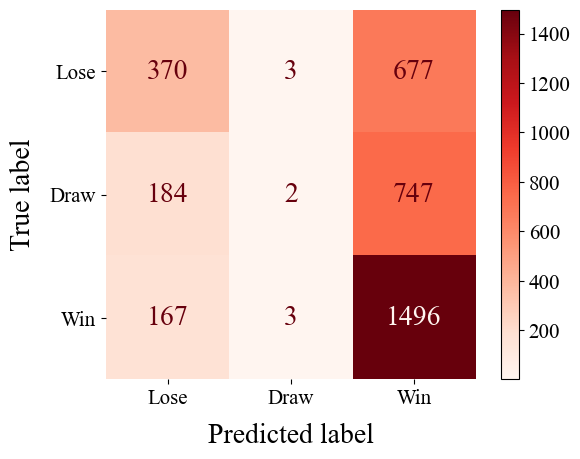

In [182]:
plot_confusion_matrix(rfc,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [98]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.6


### Root Mean Squared Error

In [99]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.07


### Section Summary
> * Accuracy Score: 45
> * F1 Score Losses: 42
> * F1 Score Draws: 21
> * F1 Score Wins: 57
> * The overall accuracy score of the Random Forest model is 45, which makes the model not helpful to predict the outcome of a game with a high level of certainty. 
> * The F1 score for wins at 57, which is lower than the other models. 
> * The F1 score for losses at 42, is comparable to the other models. 
> * The F1 score for draws at 21, is among the highest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Random Forest with Grid Search

The section below shows a Random Forest model with Grid Search (for testing different hyperparameters) and its performance.

In [183]:
param_grid = {
    "n_estimators": [5, 15, 25],
    "max_features": [4, 14, 24],
    "oob_score": [True, False],
    "bootstrap": [True, False],
}

In [184]:
rfc = RandomForestClassifier(random_state=101)
grid = GridSearchCV(rfc, param_grid)

In [185]:
grid.fit(scaled_X_train, y_train);

In [186]:
grid.best_params_

{'bootstrap': True, 'max_features': 24, 'n_estimators': 25, 'oob_score': True}

In [187]:
rfcgs = RandomForestClassifier(
    bootstrap=True, max_features=24, n_estimators=25, oob_score=True
)

In [188]:
rfcgs.fit(scaled_X_train, y_train)
y_predict = rfcgs.predict(scaled_X_test)

### Feature Weights

In [189]:
eli.show_weights(rfcgs, feature_names=X.columns.tolist())

Weight,Feature
0.0322 ± 0.0175,HomePlayer8
0.0304 ± 0.0133,AwayPlayer9
0.0286 ± 0.0146,HomePlayer7
0.0270 ± 0.0074,AwayPlayer8
0.0266 ± 0.0108,AwayPlayer10
0.0263 ± 0.0069,AwayPlayer4
0.0258 ± 0.0121,AwayPlayer3
0.0258 ± 0.0082,HomePlayer11
0.0257 ± 0.0087,HomePlayer6
0.0257 ± 0.0113,AwayPlayer6


### Classification Report

In [190]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.45      0.43      0.44      1050
           0       0.31      0.15      0.20       933
           1       0.55      0.73      0.63      1666

    accuracy                           0.50      3649
   macro avg       0.44      0.44      0.42      3649
weighted avg       0.46      0.50      0.47      3649



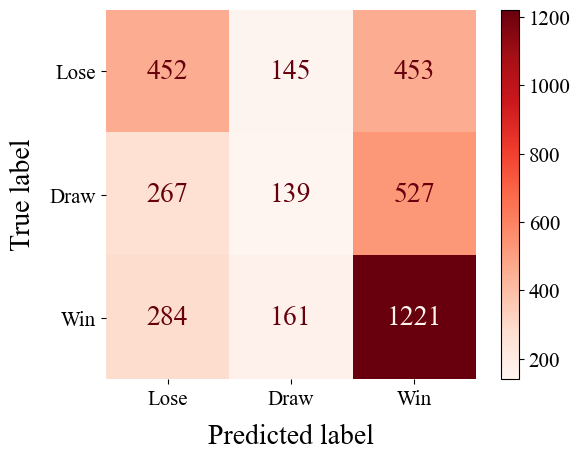

In [191]:
plot_confusion_matrix(rfcgs,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [194]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.55


### Root Mean Squared Error

In [195]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.05


### Section Summary
> * Accuracy Score: 48
> * F1 Score Losses: 42
> * F1 Score Draws: 18
> * F1 Score Wins: 63
> * The overall accuracy score of the Random Forest model with grid search is 50, which makes the model not helpful to predict the outcome of a game with a high level of certainty.  
> * The F1 score for wins at 63, is comparable to the other models. 
> * The F1 score for losses at 42, is comparable to the other models. 
> * The F1 score for draws at 18, is among the highest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Random Forest with Randomized Search Cross Validation

The section below shows a Random Forest model with Randomized Search Cross Validation (for testing different hyperparameters) and its performance.

In [196]:
param_dist = {
    "n_estimators": [50, 100, 150, 200],
    "max_depth": [2, 4, 6, 8],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 2, 4, 6],
    "bootstrap": [True, False],
}

In [197]:
rfc = RandomForestClassifier(random_state=101)

In [198]:
rscv = RandomizedSearchCV(
    rfc, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, random_state=1
)

In [199]:
rscv.fit(scaled_X_train, y_train);

In [200]:
print("Best hyperparameters: ", rscv.best_params_)

Best hyperparameters:  {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8, 'bootstrap': True}


In [201]:
rfcrs = RandomForestClassifier(
    bootstrap=True,
    min_samples_split=2,
    n_estimators=50,
    min_samples_leaf=1,
    max_depth=8,
)

In [202]:
rfcrs.fit(scaled_X_train, y_train)
y_predict = rfcrs.predict(scaled_X_test)

### Feature Weights

In [203]:
eli.show_weights(rfcrs, feature_names=X.columns.tolist())

Weight,Feature
0.0578 ± 0.0964,HomePlayer8
0.0448 ± 0.0713,HomePlayer11
0.0427 ± 0.0778,AwayPlayer8
0.0381 ± 0.0593,AwayPlayer5
0.0378 ± 0.0645,HomePlayer9
0.0371 ± 0.0641,AwayPlayer4
0.0347 ± 0.0603,AwayPlayer3
0.0320 ± 0.0586,AwayPlayer9
0.0315 ± 0.0531,HomePlayer7
0.0315 ± 0.0526,AwayPlayer10


### Classification Report

In [204]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.50      0.36      0.41      1050
           0       0.10      0.00      0.00       933
           1       0.51      0.89      0.65      1666

    accuracy                           0.51      3649
   macro avg       0.37      0.42      0.36      3649
weighted avg       0.40      0.51      0.42      3649



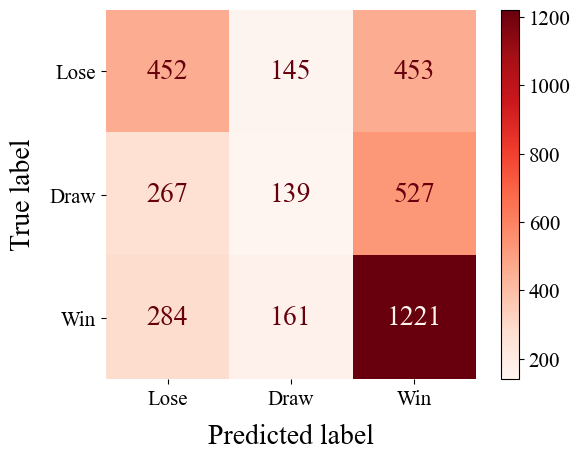

In [207]:
plot_confusion_matrix(rfcgs,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [208]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.66


### Root Mean Squared Error

In [209]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.09


### Section Summary
> * Accuracy Score: 51
> * F1 Score Losses: 42
> * F1 Score Draws: 01
> * F1 Score Wins: 65
> * The overall accuracy score of the Random Forest model with randomized search is 51, which makes the model not helpful to predict the outcome of a game with a high level of certainty.  
> * The F1 score for wins at 65, is comparable to the other models. 
> * The F1 score for losses at 42, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.
> * There is no one feature or set of features that can give the best predictions. 

## Support Vector Classification (SVC)

The section below shows a Support Vector Classification (SVC) model and its performance.

In [210]:
svc = SVC(kernel="rbf", decision_function_shape="ovr")

In [211]:
svc.fit(scaled_X_train, y_train)
y_predict = svc.predict(scaled_X_test)

### Classification Report

In [212]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.52      0.43      0.47      1050
           0       0.31      0.04      0.06       933
           1       0.53      0.86      0.66      1666

    accuracy                           0.52      3649
   macro avg       0.46      0.44      0.40      3649
weighted avg       0.47      0.52      0.45      3649



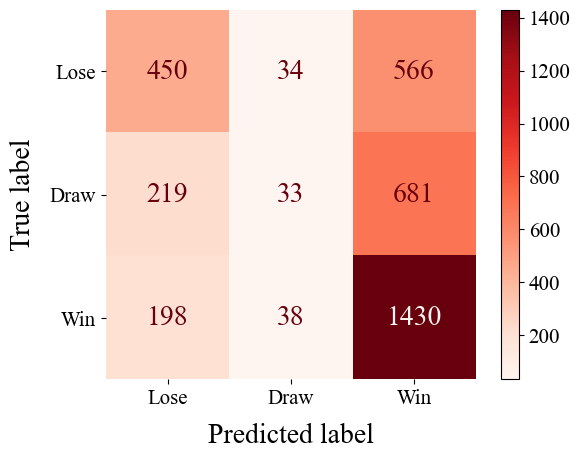

In [213]:
plot_confusion_matrix(svc,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [214]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.54


### Root Mean Squared Error

In [215]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.05


### Section Summary
> * Accuracy Score: 53
> * F1 Score Losses: 47
> * F1 Score Draws: 6
> * F1 Score Wins: 66
> * The overall accuracy score of the SVC model is 53, which makes the model not helpful to predict the outcome of a game with a high level of certainty. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 47, is comparable to the other models. 
> * The F1 score for draws at 06, is among the lowest as compared to the other models.

##  Principle Component Analysis (PCA)

The section below shows a Principle Component Analysis(PCA) and its performance.

In [216]:
pipe = Pipeline(
    [("pca", PCA(n_components=18)), ("logistic", LogisticRegression(max_iter=10000))]
)

In [217]:
pipe.fit(scaled_X_train, y_train);

In [218]:
y_predict = pipe.predict(scaled_X_test)
score = pipe.score(X_test, y_test)

### Classification Report

In [219]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

          -1       0.47      0.50      0.48      1050
           0       0.27      0.00      0.01       933
           1       0.55      0.83      0.66      1666

    accuracy                           0.52      3649
   macro avg       0.43      0.44      0.38      3649
weighted avg       0.45      0.52      0.44      3649



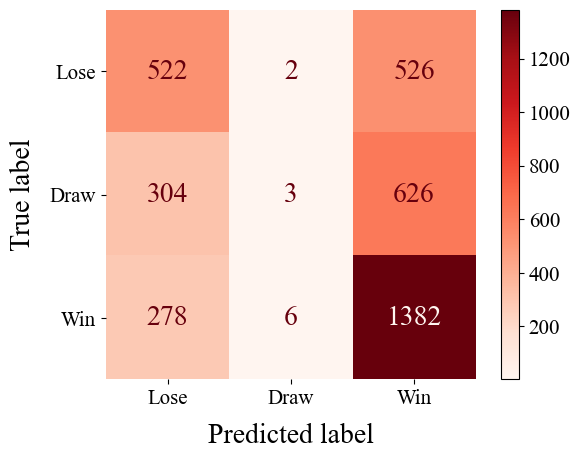

In [220]:
plot_confusion_matrix(pipe,scaled_X_test,y_test, cmap=plt.cm.Reds)
plt.xticks([0,1,2],['Lose', 'Draw', 'Win'])
plt.yticks([0,1,2], ['Lose', 'Draw', 'Win']);

### R-Squared

In [221]:
print_rsquared(y_test, y_predict)

R-Squared value is:  -0.59


### Root Mean Squared Error

In [222]:
root_mean_squared_error(y_test, y_predict)

Root Mean Square Error is:  1.07


### Section Summary
> * Accuracy Score: 52
> * F1 Score Losses: 48
> * F1 Score Draws: 01
> * F1 Score Wins: 66
> * The overall accuracy score of the PCA model is 52, which makes the model not helpful to predict the outcome of a game with a high level of certainty. 
> * The F1 score for wins at 66, is comparable to the other models. 
> * The F1 score for losses at 48, is comparable to the other models. 
> * The F1 score for draws at 01, is among the lowest as compared to the other models.  

# Conclusions

Here is a summary of the conclusions that may be drawn from this report. 

>* **The Analysis of the Data:** I reviewed nearly 200,000 data points related to European football matches. <br> 
>* **The Goal of the Project:** The major goal of this project was to find a model that could predict the outcome of a match with an adequate level of certainty.
I utilized the 8 models listed below. Looking at the accuracy scores, the R-Squared numbers, and Root Mean Squared Errors, none of the models I utilized can be relied on with a high level of confidence to predict the outcome of a match.
    1. Logistic Regression
    2. Logistic Regression with Elastic Net Regularization
    3. Decision Tree
    4. Random Forest
    5. Random Forest with Grid Search
    6. Random Forest with Randomized Search
    7. Support Vector Classification (SVC)
    8. Principle Component Analysis (SVC)    <br> 
<br>  
>* **Simple Guesses:** From some of the measures, like the number of goals, crossings and penalties, teams usually did better when they played at home than when they played away from home. Without any other data to rely on, a safe "guess" may be to pick the winner of a match simply based on if a team is playing at home or away from home.
>* **Business Recommendation:** I recommend moving with caution if one decides to create a business based on betting on such matches.

# Suggestions for Improvement

This report has certain weaknesses. In this section, I outlined those weaknesses and indicated some avenues for improvement. 

>* **Data on the Players:** Clear information about players in each team is not part of this data set. This is one of the major areas of improvement. <br>
>* **Data on the Teams and Matches:** Some of the information on teams or matches seemed unreliable. Better data collection practices could improve the quality of the data.   
>* **The Data Scientist:** It is best if the data scientist, has adequate background knowledge on the topic of the analysis. I have no expertise in football. There may be parts of the data that I have overlooked that may have been most important and I may have given importance to parts of the data that may have had little significance. For example, I only became aware that teams in a league play among themselves. I would have grouped the data better had I known this fact earlier.<br>
>* **Statistics:** I will continue to improve my statistical knowledge to create better analyses.<br>
>* **Pandas:** I will continue to learn to utilize more optimized Pandas techniques and algorithms.<br>
>* **Seaborn and Matplotlib:** I will continue to improve my knowledge of Seaborn and Matplotlib for creating visualizations. <br>
>* **Python Code:** I will continue to write better and more efficient Python code. <br>
>* **Clean Code:** I will continue to adhere to the principles of writing clean code. <br>
>* **Readability and Efficiency:** I will continue to improve my skills to find the delicate balance between readability and efficiency in coding.<br>